## <span style="color:Blue">Importing Libraries

In [17]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
import seaborn as sns

## <span style="color:Blue">Get Data

In [18]:
data = pd.read_csv('Datasets/Fremont.csv',index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


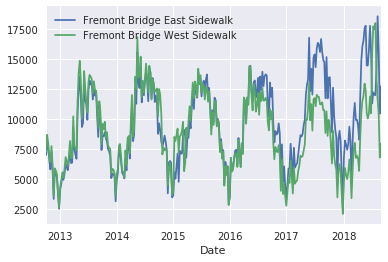

In [19]:
%matplotlib inline
data.resample('W').sum().plot()

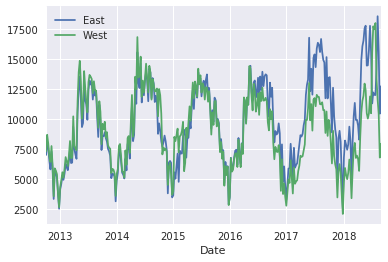

In [20]:
data.columns=['East','West']
data.resample('W').sum().plot()

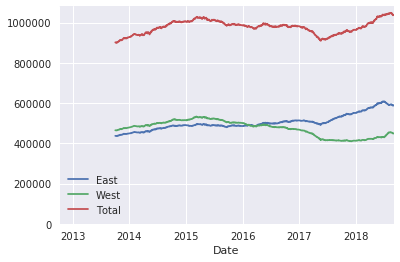

In [21]:
data['Total'] = data['West']+data['East']
ax=data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None);

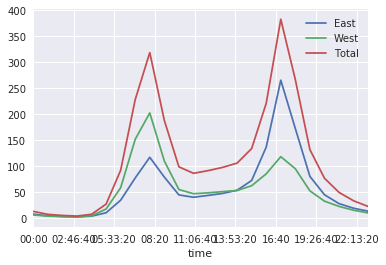

In [22]:
data.groupby(data.index.time).mean().plot()

In [23]:
pivoted = data.pivot_table('Total',index = data.index.time,columns = data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


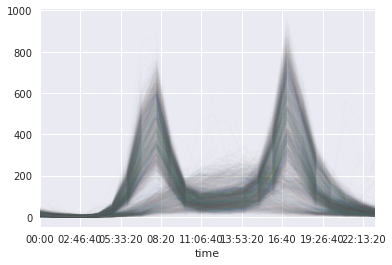

In [24]:
pivoted.plot(legend = False,alpha = 0.01)

## <span style="color:Blue">Prinicipal Component Analysis

In [25]:
X = pivoted.fillna(0).T.values
X.shape

(2159, 24)

In [26]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2159, 2)

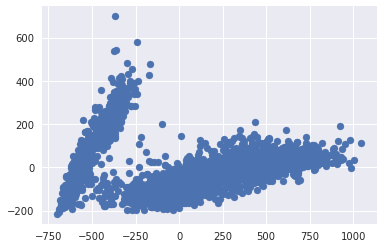

In [27]:
plt.scatter(X2[:, 0], X2[:, 1]);

## <span style="color:Blue">Unsupervised Clustering

In [28]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

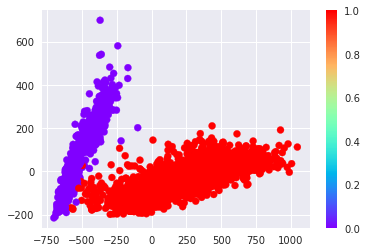

In [29]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

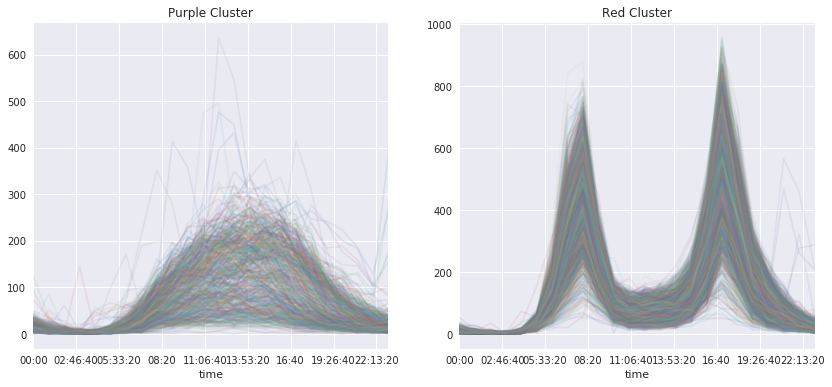

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## <span style="color:Blue">Comparing With Days Of Week

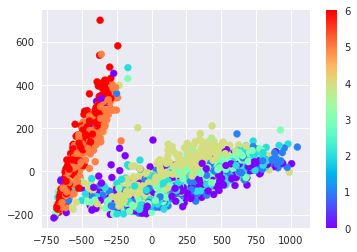

In [31]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();

## <span style="color:Blue">Analyzing Outliers

In [32]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23',
               '2018-08-24', '2018-08-27', '2018-08-28', '2018-08-29',
               '2018-08-30', '2018-08-31'],
              dtype='datetime64[ns]', length=1492, freq=None)